# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


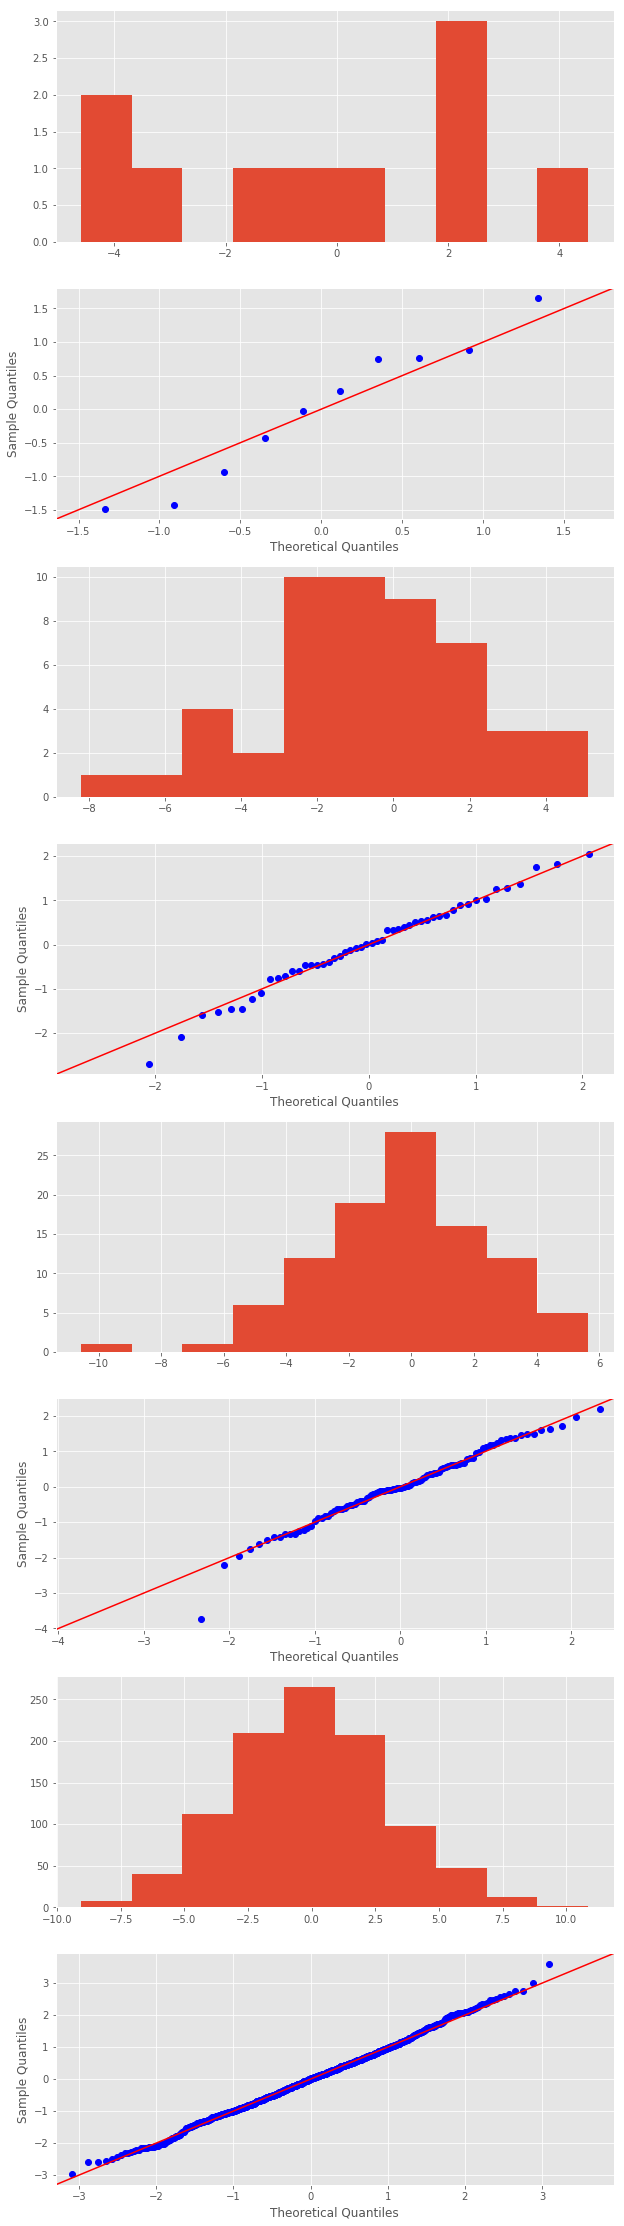

In [8]:
# Plot histograms and Q-Q plots for above datasets
data_list = [x_10,x_50,x_100,x_1000]
fig, ax = plt.subplots(len(data_list)*2,1,figsize=(10,40))
ax_counter = 0

for i in range(len(data_list)):
    ax[ax_counter].hist(data_list[i])
    ax_counter += 1
    sm.graphics.qqplot(data_list[i], dist=stats.norm, line='45', fit=True, ax=ax[ax_counter])
    ax_counter += 1

plt.show()

Histograms should not be used solely to detect normality.  While good for seeing if data is symmetric, skewed, or contains outliers, it does not give a clear indication on if the data is normal or not.  Q-Q plots are a much better visualization because it gives a normality reference to compare the data too.  While it is better than using histograms, it still requires visual recognition which can be subjective.  

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

In [18]:
a = stats.norm.rvs(loc=0,scale=3,size=10)

a, len(np.where(a<0)[0])

(array([-4.65168986,  1.6771886 , -1.54254175, -2.71270239, -0.50852802,
        -7.29540649,  1.12663773,  2.57984069, -1.68957112, -3.85570721]), 7)

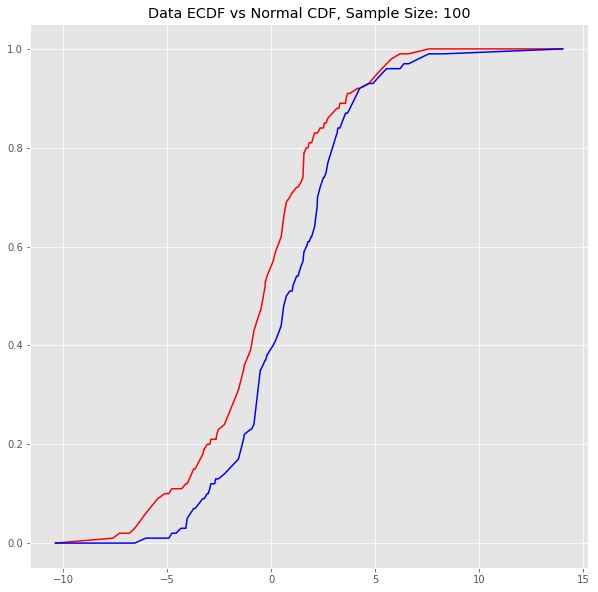

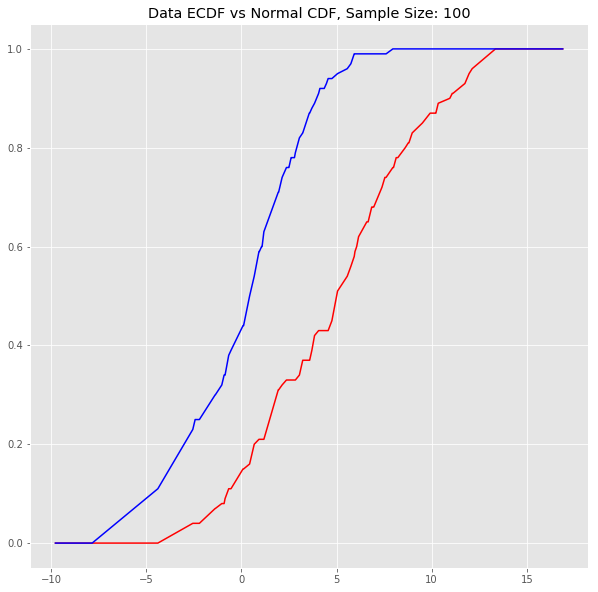

In [26]:
# You code here 

def ks_plot(data):

    normal_data = stats.norm.rvs(loc=0, scale=3, size=len(data))
    all_sorted_data = sorted(data+normal_data)
    fdata = []
    fnorm = []
    
    for value in all_sorted_data:
        fdata.append(len(np.where(data<=value)[0])/len(data))
        fnorm.append(len(np.where(normal_data<=value)[0])/len(normal_data))
    
    fig = plt.figure(figsize=(10,10))
    plt.plot(all_sorted_data,fdata,label='ECDF',color='red')
    plt.plot(all_sorted_data,fnorm,label='CDF',color='blue')
    plt.title('Data ECDF vs Normal CDF, Sample Size: {}'.format(len(data)))
    plt.show()
    
        
    
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

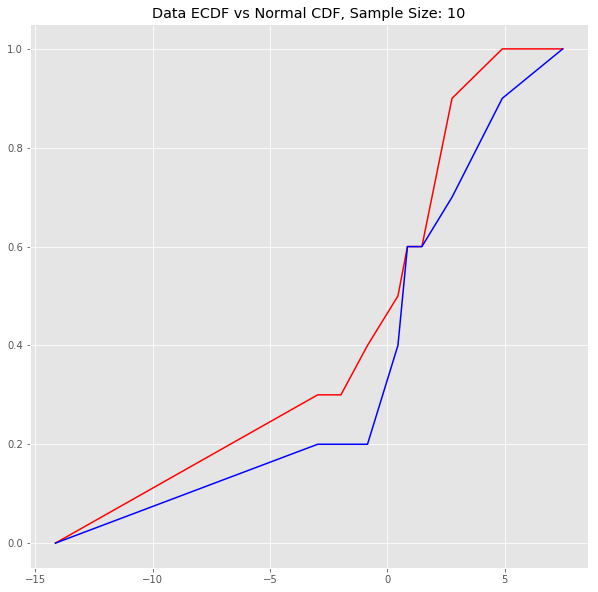

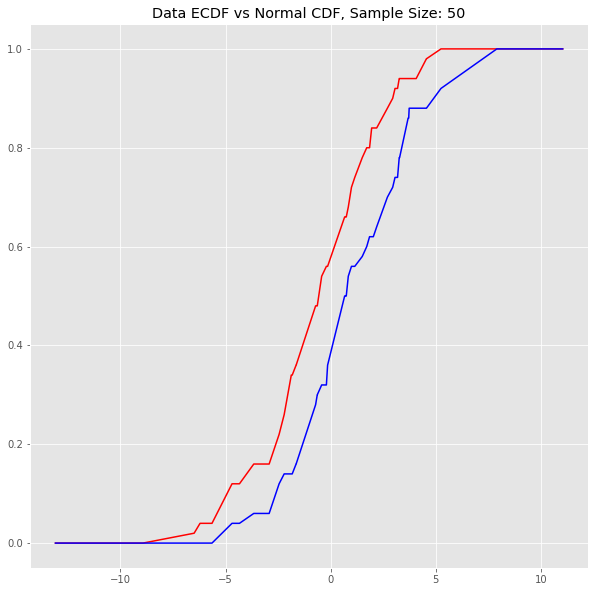

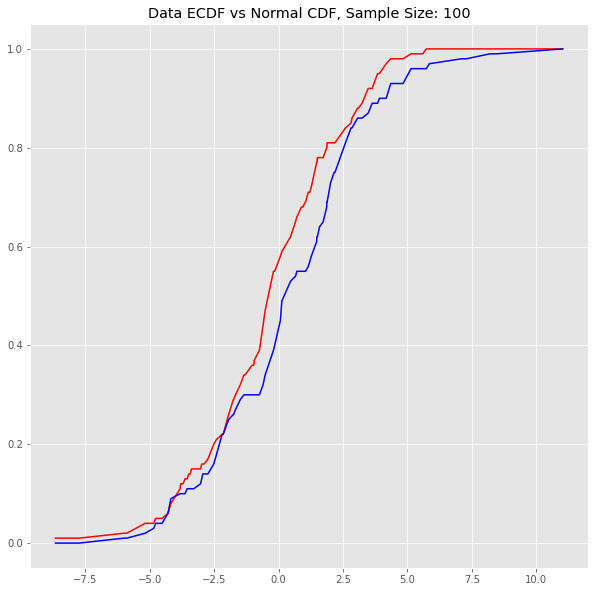

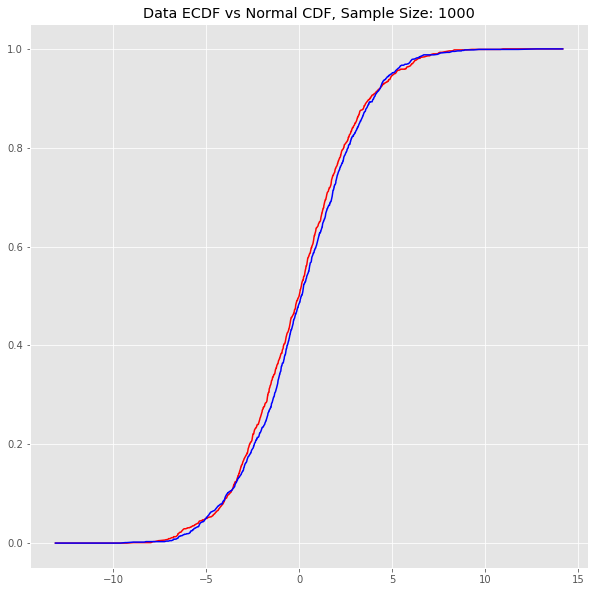

In [27]:
# Your code here 
for data in data_list:
    ks_plot(data)

We know that in this exercise, that all samples involved are drawn randomly and independently from the same distribution.  In a controlled environment, the K-S test should show no significant difference between the compared samples.  In sample sizes less than 100, we see that variation due to randomness is big enough for us to consider rejecting the null hypothesis while it shouldn't be (type i error).  As sample size grows, the effect on the comparison due to randomness is minimized.  

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [33]:
# Perform K-S test 

# Your code here
for data in data_list:
    print(stats.kstest(data, 'norm', args=(0,3)))

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.14084521862313365, pvalue=0.9887942884067226)
KstestResult(statistic=0.11751829618839271, pvalue=0.465569939484225)
KstestResult(statistic=0.08789343036568975, pvalue=0.4026100159156396)
KstestResult(statistic=0.02008280060657469, pvalue=0.8147258931069457)


All p-values are greater than our alpha threshhold.  We fail to reject the null hypothesis in all four cases.  

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [36]:
x_uni = np.random.rand(1000)
# Try with a uniform distribution

print(stats.kstest(x_uni,'uniform',N=1000))
print(stats.kstest(x_uni,'norm',N=1000))


# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.027081298699937695, pvalue=0.45311220368557326)
KstestResult(statistic=0.5005315729075455, pvalue=0.0)


We fail to reject the null hypothesis when applying the KS test on the uniform distributions.  When comparing the uniform distribution to the normal one, the KS test shows significant evidence such that we reject the null hypothesis.

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

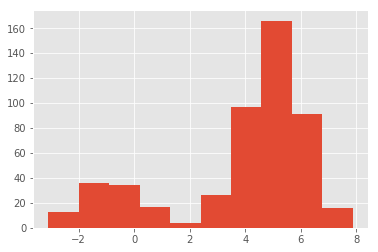

In [64]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))
plt.hist(x_1000_bi);



Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

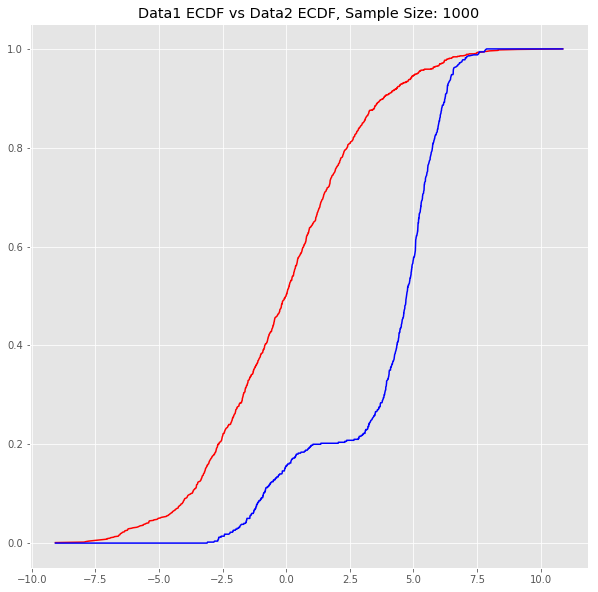

In [69]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    
    '''
    all_sorted_data = sorted(list(data_1)+list(data_2))
    fdata1 = []
    fdata2 = []
    
    for value in all_sorted_data:
        fdata1.append(len(np.where(data_1<=value)[0])/len(data_1))
        fdata2.append(len(np.where(data_2<=value)[0])/len(data_2))
    
    fig = plt.figure(figsize=(10,10))
    plt.plot(all_sorted_data,fdata1,label='ECDF1',color='red')
    plt.plot(all_sorted_data,fdata2,label='ECDF1',color='blue')
    plt.title('Data1 ECDF vs Data2 ECDF, Sample Size: {}'.format(len(data_1)))
    plt.show()

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi)


Just visually speaking, we see that both ecdfs diverge by a large amount and we can expect the d-stat to be large as well.  It should be large enough such that we reject the null hypothesis.  

Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [71]:
# Your code here
stats.ks_2samp(x_1000, x_1000_bi)
# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.635, pvalue=8.672806643569311e-119)

As expected, the p value is much less than the alpha threshold and signifies that we should reject the null hypothesis. 

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 